In [1]:
import sys
sys.path.append("../lib/")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from raman_lib.spectra_scoring import score_sort_spectra
from raman_lib.misc import load_data
from raman_lib.visualization import plot_spectra_peaks
from raman_lib.preprocessing import RangeLimiter, BaselineCorrector

In [10]:
path = "../data/L_540_2022_C_E.csv"

# Spectral range to analyze
# Use 'None' to use the whole range'
wn_min = None
wn_max = None

# QC settings - Choose either A or B and set the other to 'None'
# A)
n = None # How many spectra (per class) to keep (exactly this number - or less 
         # if a class does not contain enough spectra)
         
# B)
score_min = 1000 # Minimum quality score that a spectrum must have to be kept.
n_min = 0 # Number of spectra that will be kept per class regardless of the score

# Window size for the Savitzky-Golay-Filter. Higher means stronger smoothing and less peaks found
sg_window = 35

# Threshold for the derivative. Higher means less peaks found.
threshold = 0.001

# Minimum height a peak must have to be detected
min_height = 50

# Plot baseline corrected (False) or raw spectra (True)
plot_raw = True

In [11]:
data = pd.read_csv(path)

print("Number of spectra per class:")
print(data.label.value_counts())

Number of spectra per class:
Control      330
Etoposide    314
Name: label, dtype: int64


In [12]:
data_new, deriv, score_dict = score_sort_spectra(data, 
                                                 n=n,
                                                 min_score=score_min, 
                                                 min_n=n_min,
                                                 limits=(wn_min, wn_max), 
                                                 sg_window=sg_window, 
                                                 threshold=threshold, 
                                                 min_height=min_height,
                                                 detailed=True)

print()
print("====================================")
print()
print("Number of spectra per class (after QC):")
print(data_new.label.value_counts())



Number of spectra per class (after QC):
Control      262
Etoposide    250
Name: label, dtype: int64


In [13]:
wns = data.drop(columns=["label", "file"]).columns.astype("float")
if plot_raw:
    data_plot = data.drop(columns=["label", "file"])
else:
    bl = BaselineCorrector()
    data_plot = bl.fit_transform(data.drop(columns=["label", "file"]))
    data_plot = pd.DataFrame(data_plot, columns=wns)

rl = RangeLimiter(lim=(wn_min, wn_max), 
                  reference=wns)
data_plot = rl.fit_transform(data_plot)
wns_plot = np.asarray(data_plot.columns.astype("float"))

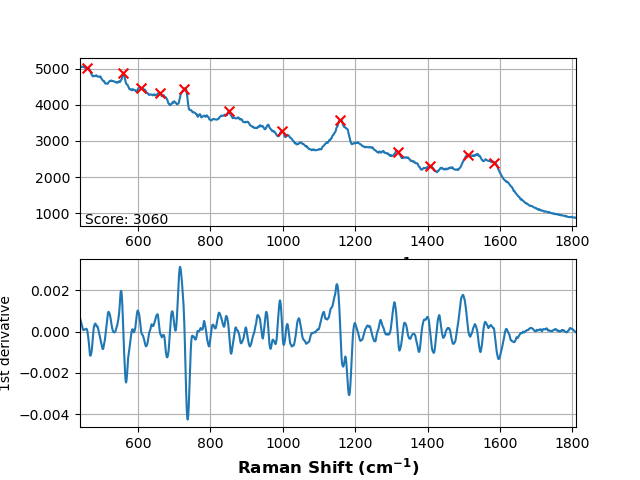

In [14]:
%matplotlib widget
plot_spectra_peaks(wns_plot, 
                   data_plot, 
                   deriv,
                   score_dict["peak_pos"],
                   score_dict["total_scores"])